In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # makes the notebook fill the whole window

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# from bokeh.io import output_file, show
# from bokeh.models import ColumnDataSource, GMapOptions
# from bokeh.plotting import gmap

from PIL import Image, ImageDraw
import os
import shutil

from mpl_toolkits.basemap import Basemap

%matplotlib inline

#Turn off interactive plotting for pyplot
plt.ioff()

In [2]:
# Read in a particular date
date = "20170901"
df = pd.read_csv('./WWLN_2017/A' + date + '.loc',header=None,names=["Date","Time","Latitude","Longitude","Error","Number of Stations"],low_memory=False)

#Functions to get the time
def GetHours(x):
    hours = int(x[0:2])
    return hours

def GetMinutes(x):
    minutes = int(x[3:5])
    return minutes

def GetSeconds(x):
    seconds = int(x[6:8])
    return seconds

def GetMicroseconds(x):
    ms = int(x[9:])
    return ms

def GetTotalMinute(x):
    hours = int(x[0:2])
    minutes = int(x[3:5])
    return 60 * hours + minutes

df['Hours'] = df['Time'].apply(GetHours)
df['Minutes'] = df['Time'].apply(GetMinutes)
df['Seconds'] = df['Time'].apply(GetSeconds)
df['MicroSeconds'] = df['Time'].apply(GetMicroseconds)
df['TotalMinutes'] = df['Time'].apply(GetTotalMinute)

In [3]:
# Make a directory to store the images
os.mkdir('./data/images')

In [ ]:
plt.figure(figsize=(30,15))
# Map of the world
m = Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,lon_0=0,lat_0=0)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Plot the lightning data
m.plot(df[df['TotalMinutes'] <= 30]['Longitude'], df[df['TotalMinutes'] <= 30]['Latitude'], linestyle='none', marker="o", markersize=8, alpha=0.7, c="orange", markeredgecolor="black", markeredgewidth=1)
plt.title("0 minutes")
plt.savefig("./data/test",bbox_inches='tight')

In [ ]:
images = []

#Turn off the max figure warnjing for MatPlotLib
mpl.rcParams.update({'figure.max_open_warning': 0})

#Every 30 minutes, plot the lightning data
for x in range(0,1440,30):#0,1440,30
    plt.figure(figsize=(30,15))
    # Map of the world
    m = Basemap(llcrnrlon=-180, llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,lon_0=0,lat_0=0)
    m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
    m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
    m.drawcoastlines(linewidth=0.1, color="white")

    # Plot the lightning data
    m.plot(df[(df['TotalMinutes'] <= x + 30) & (df['TotalMinutes'] >= x)]['Longitude'], df[(df['TotalMinutes'] <= x + 30) & (df['TotalMinutes'] >= x)]['Latitude'], linestyle='none', marker="o", markersize=8, alpha=0.7, c="orange", markeredgecolor="black", markeredgewidth=1)
    plt.title(str(x) + "minutes")
    name = "./data/images/Minute" + str(x)
    plt.savefig(name,bbox_inches='tight')
    #store images for gif creation
    images.append(Image.open(name + '.png'))

#create gif
images[0].save('./data/gifs/'+ date + '.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

In [ ]:
shutil.rmtree('./data/images')

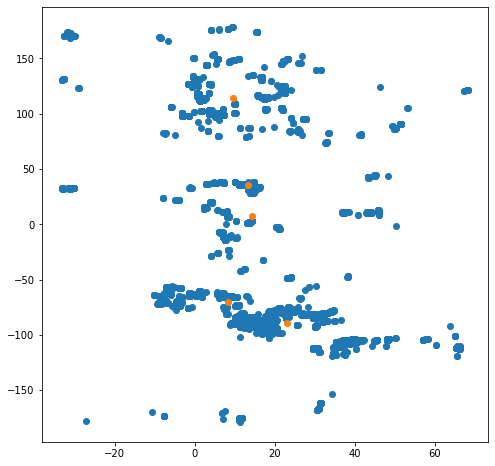

Wall time: 1min 26s


In [5]:
%%time
#Import Fuzzy C-Means, put it on the data, run it, plot it
# VERY SLOW
import FCM

test = FCM.FCM(df[df['TotalMinutes'] <= 20][['Latitude','Longitude']],5,2,maxiter=5,genCentroids=True)

test.fit()

test.plot()

In [7]:
test._A[0].sum()

0.9999999999999999

In [7]:
df[df['TotalMinutes'] <= 20]

,Date,Time,Latitude,Longitude,Error,Number of Stations,Hours,Minutes,Seconds,MicroSeconds,TotalMinutes
0,2017/09/01,00:00:00.001007,16.2616,-94.2412,20.1,6,0,0,0,1007,0
1,2017/09/01,00:00:00.074226,16.7464,133.0010,9.6,7,0,0,0,74226,0
2,2017/09/01,00:00:00.145828,16.6843,133.1596,20.3,5,0,0,0,145828,0
3,2017/09/01,00:00:00.966416,14.1522,-88.8682,21.5,16,0,0,0,966416,0
4,2017/09/01,00:00:00.966437,14.2754,-88.8827,19.8,5,0,0,0,966437,0
...,...,...,...,...,...,...,...,...,...,...,...
8696,2017/09/01,00:20:59.258062,21.9772,123.3123,14.4,7,0,20,59,258062,20
8697,2017/09/01,00:20:59.548098,18.2258,114.7013,16.0,8,0,20,59,548098,20
8698,2017/09/01,00:20:59.751224,18.1876,114.6418,14.1,6,0,20,59,751224,20
8699,2017/09/01,00:20:59.049120,14.0251,-87.6172,6.5,5,0,20,59,49120,20
